<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe9_KruskalAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de optimización.

**Entrada**: Grafo **conectado no dirigido y ponderado** $G=(V,E)$ y un costo real $c_e$ para cada arco $e\in E$.

**Salida**: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

![image](https://static.javatpoint.com/ds/images/kruskals-algorithm1.png)


Cuando se habla de **grafos conexos no dirigidos y ponderados**, sabemos que cada nodo o vértice posee una conexión con otros vértices conocidas también como arcos, y que dichos arcos poseen un costo o peso para llevarse a cabo. Ahora bien, teniendo esta información en cuenta, igualmente se puede dar a conocer **un árbol que recorre cada nodo del grafo original y sin ciclos** de tal manera que el costo de sus conexiones sea el mínimo posible, es decir, un **Árbol Recubridor Mínimo** (o Minimum Spanning Tree). 

Existen diversos algoritmos que nos pueden facilitar esta tarea, sea dado un grafo de entrada (conexo y no dirigido) junto a los costos de cada uno de sus arcos. Uno de estos algoritmos es conocido como el *Algoritmo de Kruskal*.

#2. Algoritmo de Kruskal. (Minimum Spanning Tree)

##2.1 Código

El siguiente código muestra una implementación del Algoritmo de Kruskal. Cabe destacar que el algoritmo es de tipo **Greedy**.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random


verbose = False
visualize = False

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados

def showGraph(G):
  # spring_layout: define posiciones para los nodos del grafo
  pos=nx.spring_layout(G)

  # para mostrar los arcos con sus etiquetas
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)

  # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
  nx.draw(G,pos, node_color='blue', with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =7.0, edge_color ="grey")

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph

# Recibe un grafo de tipo array
# Retorna un nx.Graph de la libreria networkx
def graph_to_nxgraph(graph):
  nxgraph = nx.Graph()
  for i in graph:
    nxgraph.add_edge(i[0], i[1], weight=i[2])
  return nxgraph

def find(i):
    while parent[i] != i:
        i = parent[i]
    return i

def union(i, j):
  a = find(i)
  b = find(j)
  parent[a] = b

def kruskalMST(G, visualize = False, verbose = False):
  g = [] #Conjunto inicialmente vacío que almacenará MST final.

  arcos_sorted = sorted(G, key = lambda nodo: nodo[2]) #Se ordenan los arcos de menor a mayor según el costo o peso.
  if(verbose):
    print("")
    print(f"Se ordenan los arcos según peso.")
    print(arcos_sorted)
    print("")

  i = 0 #Nos posicionamos en el arco de menor peso.
  if(verbose): 
    print("Seleccionamos siempre el arco de menor peso.")
    print("")

  while i < len(G) - 1:
     arco = arcos_sorted[i]; #Seleccionamos el arco de la iteración actual.
     if(verbose): 
      print(f"Escogemos el arco actual, con vértices {arcos_sorted[i][0]}, {arcos_sorted[i][1]} y peso {arcos_sorted[i][2]}")
     i+=1 # Nos preparamos para el siguiente arco.
     aa = find(arco[0]) #Encontramos el grupo al que pertenecen los vértices a y b del arco, respectivamente.
     if(verbose): print(f"{arco[0]} pertenece al grupo del nodo {aa}")
     bb = find(arco[1])
     if(verbose): print(f"mientras que {arco[1]} pertenece al grupo del nodo {bb}")
     if aa != bb: #Si los grupos son distintos, entonces no se genera un ciclo.
         if(verbose): 
           print("")
           print(f"Los nodos pertenecen a grupos distintos, no hay ciclo!")
         g.append(arco) #Se añade el arco a la solución final.
         union(aa, bb) #Se unifican los grupos de a y b.

         if(verbose): 
           print("Se añade el arco actual al conjunto solución y se unen los grupos de a y b.")
           print("")
     else:
        if(verbose): 
          print("")
          print("Nodos son del mismo grupo, se genera ciclo.")
          print("Arco actual es ignorado de la solución final.")
          print("")


  min = 0 #Contador de costo total del MST.
  if(verbose): 
    print("Se comienza a calcular peso de MST final.")
    print("")
  for arco in g:
     if(verbose): print(f"Para el arco {arco}, su peso es {arco[2]}.")
     min += arco[2] #Recorremos los arcos del MST sumando sus costos a min.
     if(verbose): 
       print(f"Peso total hasta ahora: {min}")
       print("")

  if(visualize):
    g_grafo = graph_to_nxgraph(g) 
    showGraph(g_grafo)
    plt.title("Minimum Spanning Tree")
    plt.show()

  return g, min #Retornamos el MST y su costo total.
  

#Ejemplo 

V = 3
parent = [i for i in range(V)] #Arreglo que almacena los padres de cada nodo (Union-Find).
G = graph_instance_creator(V)

print("Grafo de entrada: ", G)

graphMST, min = kruskalMST(G, visualize, verbose)

print("")
print("Las conexiones del MST resultante son: ", graphMST)
print("El costo del MST para este grafo es: ", min)

Grafo de entrada:  [[0, 1, 398], [0, 2, 454], [1, 2, 204]]

Las conexiones del MST resultante son:  [[1, 2, 204], [0, 1, 398]]
El costo del MST para este grafo es:  602


##2.2 Descripción del algoritmo.

**Subestructura óptima**

Como en este caso estamos trabajando bajo el paradigma de un **algoritmo voraz**, previo a explicar cómo funciona, hay que definir la subestructura óptima de nuestro problema.

Considérese $e = (u, v)$ un arco de algún MST. Podemos contraer $e$ uniendo los vértices $u$ y $v$ para así crear un nuevo vértice. Luego, culaquier arco adyacente a dichos vértices es adyacente al nuevo vértice creado, y esto podría resultar en un multiarco si $u$ y $v$ poseen un mismo vecino. 
Esto lo resolvemos creando un único arco con el menor peso de entre los dos arcos.

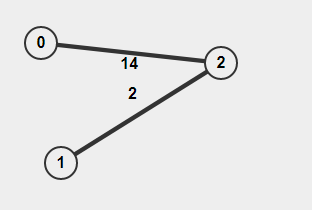

Lo anteriormente dicho nos lleva al siguiente lema:

> Si $T'$ es un MST de $G/e$, entonces $T'$ ∪ {e} es un MST de $G$.

**Prueba del lema:** Sea $T*$ un MST de G que contiene el arco $e$. Entonces $T*/e$ es árbol recubridor de $G' = G/{e}$. Por definición, $T'$ es un MST de $G'$. Es gracias a esto mismo que el peso de $T'$ ó $w(T')$ es menor o igual al de $T*/e$ ó $w(T*/e)$. Luego:

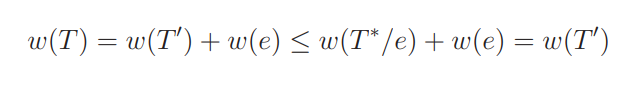

**Funcionamiento del algoritmo**

El algoritmo recibe como entrada un grafo conectado no dirigido y ponderado $G=(V,E)$ con $V$ los $n$ nodos del grafo y $E$ arcos.

1. Se crea un conjunto vacío `g`, el cual contendrá el árbol recubridor mínimo final.

2. Se procede a ordenar los arcos del grafo de entrada `G` de menor a mayor según el peso de cada uno de ellos, y guardamos el resultado en un arreglo auxiliar `arcos_sorted`.

4. Por cada valor de `i` desde `0` hasta `len(G) - 1`, tomamos el arco `arco = arcos_sorted[i]` y buscamos el grupo al que pertenecen sus vértices `arco[0]` y `arco[1]`, respectivamente con la función $find$.

   * La función $find$ recibe el valor de un vértice como `i` y utiliza un arreglo `parent = [0,...,V-1]`. Luego, se recorre el arreglo `parent`, diciendo que cuando `parent[i]` sea distinto de `i`, el segundo tomará el valor del primero. Finalmente, se retorna el valor de `i`.

 Luego, si los grupos son distintos, quiere decir que no se forma un ciclo, por lo que se inserta el conjunto `arco` en el conjunto `g` y se unen los grupos de ambos vértices con la función $union$.

   * La función $union$ recibe dos vértices como `i` y `j` y utiliza el arreglo `parent` antes mencionado. Se inicializan dos valores como `a = find(i)` y `b = find(j)`, respectivamente. Finalmente, el valor de `parent[a]` será `b`.

5. Inicializamos una variable `min = 0` que almacenará el peso total de nuestro MST final. Luego, para cada valor de `arco` dentro del conjunto `g`, le sumamos el valor de `arco[2]` (el peso del arco actual) a la variable `min`.

6. Finalmente, retornamos el conjunto `g` y el peso total `min`.

$V$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

Cuando la variable `visualize` es `True`, se muestra por pantalla el grafo (camino) del MST resultante.

##2.3 Ejemplo

Considere un grafo conexo no dirigido de $V=3$ vértices, cuyos arcos son:

$G = [[0, 1, 214], [0, 2, 18], [1, 2, 394]]$

Y además tenemos un arreglo $parent$ que almacenará los "padres" de cada nodo, pero que inicialmente tendrá los nodos del grafo:

$parent = [0, 1, 2]$

Lo primero que hacemos es crear un conjunto vacío $g$, el cual contendrá nuestro Minimum Spanning Tree resultante. Después de eso, ordenamos nuestro arreglo de arcos $G$ de menor a mayor según el peso de cada arco y lo almacenamos en un arreglo auxiliar $arcoSorted$

$g = [ ]$

$arcoSorted = [[0, 2, 18], [0, 1, 214], [1, 2, 394]]$

Una vez realizado esto, tomamos el siguiente arco del conjunto $G$ y lo almacenamos en una variable $arco$.

$arco = [0,2,18]$

Tomamos los vértices $a$ y $b$ ubicados en $arco[0]$ y $arco[1]$ respectivamente, y conseguimos el grupo al cual pertenece cada uno dado por un nodo representativo existente en el grafo original. Esto con la función $find$, la cual toma el valor el vértice como un índice $i$, y con ello recorre el arreglo $parent$ diciendo que si $parent[i]$ es distinto de $i$, entonces el índice tomará el valor de $parent$ en dicha posición.

$a = 0$

$find(a): $

$parent[0] = 0 ; parent[1] = 1 ; parent[2] = 2$

$find(a) = 0$

$b = 2$ 

$find(b): $

$parent[2] = 2$

$find(b) = 2 $

Ya que los grupos de estos dos vértices son distintos, esto quiere decir que no se forma un ciclo dentro del MST actual. Por ende, se inserta el conjunto $arco$ en $g$ y se unifican los grupos con la función $union$.

$g = [[0,2,18]]$

$union(find(a) = 0,find(b) = 2):$

$a = find(0) = 0$

$b = find(2) = 2$

$parent[0] = 2$

$parent = [2, 1, 2]$

Realizamos este mismo procedimiento con los arcos restantes de $arcoSorted$.

$arco = [0, 1, 214]$

$a = 0$

$find(a):$

$parent[0] = 2 --> find(a) = 2 ; parent[2] = 2$

$find(a) = 2$

$b = 1$

$find(b):$

$parent[1] = 1 ; parent[2] = 2$

$find(b) = 1$

Los grupos son distintos, entonces no forman un ciclo para el MST actual, se inserta el arco a la solución y se unen los grupos.

$g = [[0, 2, 18], [0, 1, 214]]$

$union(find(a) = 2,find(b) = 1):$

$a = find(2) = 2$

$b = find(1) = 1$

$parent[2] = 1$

$parent = [2, 1, 1]$

**SIGUIENTE ARCO**:

$arco = [1, 2, 394]$

$a = 1$

$find(a):$

$parent[1] = 1 ; parent[2] = 1 ---> find(a) = 1$

$find(a) = 1$

$b = 2$

$find(b):$

$parent[2] = 1 ---> find(b) = 1$

$find(b) = 1$

Como los grupos de ambos vértices son el mismo para esta iteración, esto quiere decir que se formaría un ciclo en nuestro MST actual, por lo que se ignora este arco.
Quedamos con nuestro MST final:

$g = [[0, 2, 18],[0, 1, 214]]$

Ahora, creamos un valor $min = 0$ que almacenará el costo total de este árbol. Luego, para cada arco dentro de $g$, conseguimos su peso y se lo sumamos a la variable $min$.

$arco = [0, 2, 18]; peso = 18$

$min = 18$

$arco = [0, 1, 214]; peso = 214$

$min = 232$

Finalmente, tenemos nuestro MST resultante, que es $g$, y su peso, que es $min$. 


##2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un listado de 5 claves a buscar, con arcos cuyos pesos son generados al azar.

In [ ]:
verbose = True
visualize = False
V = 5
parent = [i for i in range(V)]
G = graph_instance_creator(V)

print("Grafo de entrada: ", G)

graphMST, min = kruskalMST(G, visualize, verbose)

print("")
print("Las conexiones del MST resultante son: ", graphMST)
print("El costo del MST para este grafo es: ", min)

Grafo de entrada:  [[0, 1, 6], [0, 2, 142], [0, 3, 213], [0, 4, 82], [1, 2, 382], [1, 3, 13], [1, 4, 221], [2, 3, 245], [2, 4, 161], [3, 4, 470]]

Se ordenan los arcos según peso.
[[0, 1, 6], [1, 3, 13], [0, 4, 82], [0, 2, 142], [2, 4, 161], [0, 3, 213], [1, 4, 221], [2, 3, 245], [1, 2, 382], [3, 4, 470]]

Seleccionamos siempre el arco de menor peso.

Escogemos el arco actual, con vértices 0, 1 y peso 6
0 pertenece al grupo del nodo 0
mientras que 1 pertenece al grupo del nodo 1

Los nodos pertenecen a grupos distintos, no hay ciclo!
Se añade el arco actual al conjunto solución y se unen los grupos de a y b.

Escogemos el arco actual, con vértices 1, 3 y peso 13
1 pertenece al grupo del nodo 1
mientras que 3 pertenece al grupo del nodo 3

Los nodos pertenecen a grupos distintos, no hay ciclo!
Se añade el arco actual al conjunto solución y se unen los grupos de a y b.

Escogemos el arco actual, con vértices 0, 4 y peso 82
0 pertenece al grupo del nodo 3
mientras que 4 pertenece al grupo

##2.5 Visualización de grafo de MST.

Grafo de entrada:  [[0, 1, 362], [0, 2, 231], [0, 3, 18], [0, 4, 287], [1, 2, 13], [1, 3, 339], [1, 4, 290], [2, 3, 453], [2, 4, 212], [3, 4, 172]]


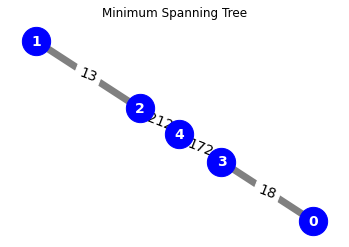


Las conexiones del MST resultante son:  [[1, 2, 13], [0, 3, 18], [3, 4, 172], [2, 4, 212]]
El costo del MST para este grafo es:  0


In [ ]:
visualize = True
verbose = False
V = 5
parent = [i for i in range(V)]
G = graph_instance_creator(V)

print("Grafo de entrada: ", G)

graphMST, min = kruskalMST(G, visualize, verbose)

print("")
print("Las conexiones del MST resultante son: ", graphMST)
print("El costo del MST para este grafo es: ", min)

#3. Correctitud



##3.1 Teorema (Correctitud de la función KruskalMST)

*El algoritmo KruskalMST recibe un vector de $E$ arcos, el cual es $G = [e_1,e_2,...,e_E]$, retornando un MST del grafo original.*

###Prueba del teorema.

Para probar la correctitud de este algoritmo, se empleará la siguiente **hipótesis $P(n)$**:

> KruskalMST retorna el MST del grafo de entrada $G = (V,E)$.

**Caso base** $(n = 0)$

Al ver que nuestro grafo de entrada está vacío $(V = 0)$, esto quiere decir que ya tenemos un MST para este caso, ya que siempre va a ser el mismo. Esto es trivialmente cierto.

**Caso inductivo** $(m < n)$

Sea $G'$ una serie de $m$ arcos y $T$ un MST que contiene a $G'$.

* Si el siguiente arco escogido $e$ está presente en $T$, entonces la hipótesis es cierta para $G' + e$.

* De no cumplirse lo anterior, entonces $T + e$ posee un ciclo $C$. Dicho ciclo contiene arcos que no pertenecen a $G'$, ya que $e$ no forma un ciclo cuando es añadido a $G'$ pero sí en $T$. Sea $g$ un arco que está en $C$ pero no en $G' + e$. Nótese que $g$ pertenece a $T$, y según la hipótesis $P$, no fue considerado por el algoritmo. Por tanto, $g$ tiene un peso mayor o igual a $e$. Luego, $T - g + e$ es un árbol, el cual posee un peso menor o igual a $T$. Por tanto, $T - g + e$ es un MST que contiene a $G' + e$.

Por tanto, por inducción, la hipótesis se mantiene cuando $G'$ se vuelve un árbol recubridor, lo cuál se cumple solamente cuando $G'$ es un MST, por lo que **KruskalMST es correcto**.

#4. Tiempo de ejecución

##4.1 Teorema 

El algoritmo `KruskalMST` en su forma implementada en el punto `2.1` posee un tiempo de ejecución $O(E*log(E))$ para **su peor y mejor caso**.

##4.2 Prueba del teorema

Al analizar detenidamente nuestro código detenidamente, podemos ver que:

 * Primero se realiza un ordenamiento del arreglo de arcos de entrada a partir de sus pesos, lo cual toma un tiempo $O(E*log(E))$ (MergeSort).
 * Iteramos sobre todos los arcos, con un tiempo de ejecución $O(E)$.
 * Por cada arco, aplicamos el algoritmo **Union-Find**, el cual se utiliza dos veces. Ambas operaciones toman a lo más un tiempo $O(log V)$.

Tenemos por tanto, la complejidad $O(E*log(E) + E*log(V))$.

Luego, ya que la cantidad de arcos es a los más $V^2$, tenemos que:

$log V^2 = 2*log(V) = O(log(V))$

Por tanto, la complejidad temporal de este algoritmo es $O(E*log(E))$.


#5. Experimentos

##5.1 Tiempo de ejecución (experimental)

El siguiente gráfico mostrará el tiempo de ejecución del algoritmo `KruskalMST`, en función del tamaño del problema `V` entre 5 y 100.

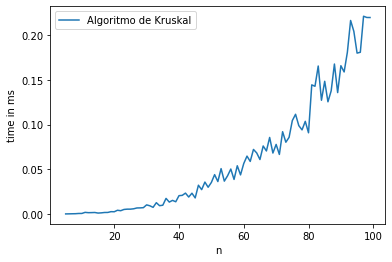

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

verb = False
visualize = False

x1=[]; y1=[]

for v in range(5,100):
  V = v
  parent = [i for i in range(V)]
  G = graph_instance_creator(V)

  #la función repeat está ejecutando 20 veces kruskalMST y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import kruskalMST", stmt=f"kruskalMST({G},{visualize},{verb})", repeat=1, number=10)

  x1.append(v)
  y1.append(t)


plt.plot(x1,y1)
plt.legend(["Algoritmo de Kruskal"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

## Análisis de resultados

Como podemos ver en nuestro grafico, y como era de esperarse, el tiempo de ejecución experimental de nuestro algoritmo sufre una curva de crecimiento exponencial, a medida que aumenta el tamaño del problema.

Cabe destacar que existen ciertos peaks de tiempos a lo largo de la gráfica. Posiblemente esto se deba a las propiedades de los arcos generados para cada grafo de prueba, así como el comportamiento impredecible de los procesadores y tal vez otros procesos que los estén utilizando.

##5.2 Tiempos de ejecución (Prim vs Kruskal)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo de Kruskal frente al algoritmo de Prim, en función del tamaño del problema `V` entre 5 y 100.

In [ ]:
import sys  # Library for INT_MAX

class Graph():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]
					for row in range(vertices)]

	# A utility function to print the constructed MST stored in parent[]
	def printMST(self, parent):
		print("Edge \tWeight")
		for i in range(1, self.V):
			print(parent[i], "-", i, "\t", self.graph[i][parent[i]])
   
	def MST(self, parent):
		r = []
		for i in range(1, self.V):
			r.append([parent[i], i, self.graph[i][parent[i]]])
		return r

	# A utility function to find the vertex with
	# minimum distance value, from the set of vertices
	# not yet included in shortest path tree
	def minKey(self, key, mstSet):

		# Initialize min value
		min = sys.maxsize

		for v in range(self.V):
			if key[v] < min and mstSet[v] == False:
				min = key[v]
				min_index = v

		return min_index

	# Function to construct and print MST for a graph
	# represented using adjacency matrix representation
	def primMST(self):

		# Key values used to pick minimum weight edge in cut
		key = [sys.maxsize] * self.V
		parent = [None] * self.V # Array to store constructed MST
		# Make key 0 so that this vertex is picked as first vertex
		key[0] = 0
		mstSet = [False] * self.V

		parent[0] = -1 # First node is always the root of

		for cout in range(self.V):

			# Pick the minimum distance vertex from
			# the set of vertices not yet processed.
			# u is always equal to src in first iteration
			u = self.minKey(key, mstSet)

			# Put the minimum distance vertex in
			# the shortest path tree
			mstSet[u] = True

			# Update dist value of the adjacent vertices
			# of the picked vertex only if the current
			# distance is greater than new distance and
			# the vertex in not in the shortest path tree
			for v in range(self.V):
				# graph[u][v] is non zero only for adjacent vertices of m
				# mstSet[v] is false for vertices not yet included in MST
				# Update the key only if graph[u][v] is smaller than key[v]
				if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
					key[v] = self.graph[u][v]
					parent[v] = u

		return self.MST(parent)

def graphToGraph2(G, n): 
  g = Graph(n)

  for u,v,w in G:
      g.graph[u-1][v-1] = w
      g.graph[v-1][u-1] = w

  return g


if __name__ == '__main__':
    g = graph_instance_creator(4)
    gr = graphToGraph2(g,4)
 
    arbol = gr.primMST()
    print(arbol)

[[0, 1, 107], [1, 2, 183], [2, 3, 73]]


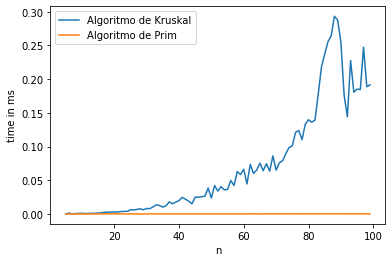

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

verb = False
visualize = False

x1=[]; y1=[]; y2=[]



for V in range(5,100):
  parent = [i for i in range(V)]
  G = graph_instance_creator(V)
  grafo2 = graphToGraph2(G,V)

  t1 = repeat(setup="from __main__ import Graph", stmt=f"{grafo2.primMST()}", repeat=1, number=10)
  t = repeat(setup="from __main__ import kruskalMST", stmt=f"kruskalMST({G},{visualize},{verb})", repeat=1, number=10)

  x1.append(V)
  y1.append(t)
  y2.append(t1)


plt.plot(x1,y1)
plt.plot(x1,y2)
plt.legend(["Algoritmo de Kruskal", "Algoritmo de Prim"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()